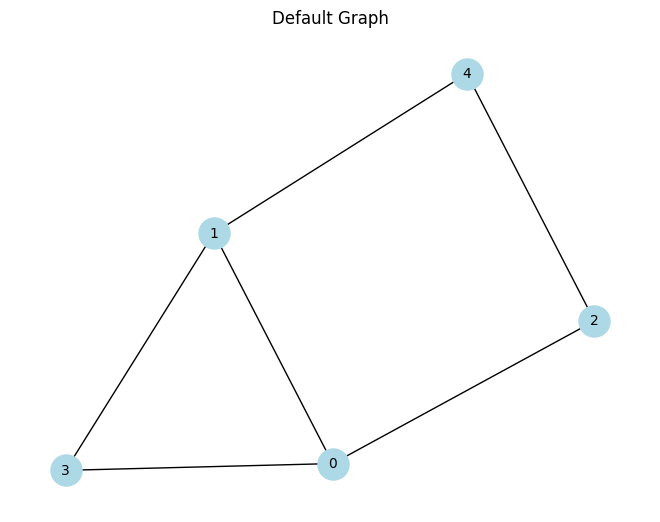

There are 10 cycles
All Hamiltonian cycles:
[0, 2, 4, 1, 3, 0]


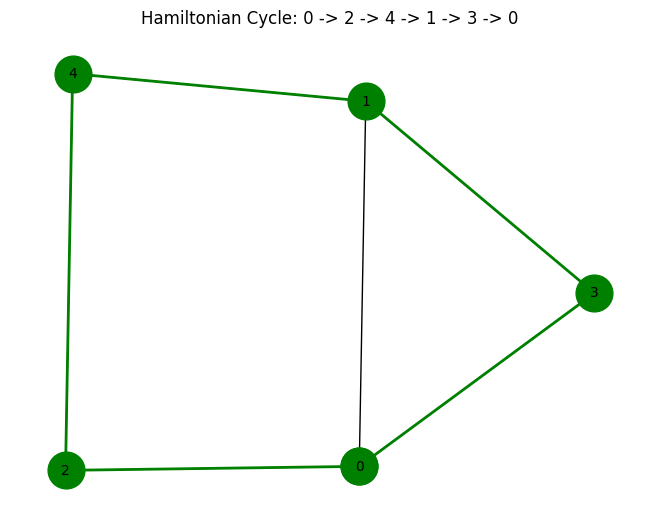

[0, 3, 1, 4, 2, 0]


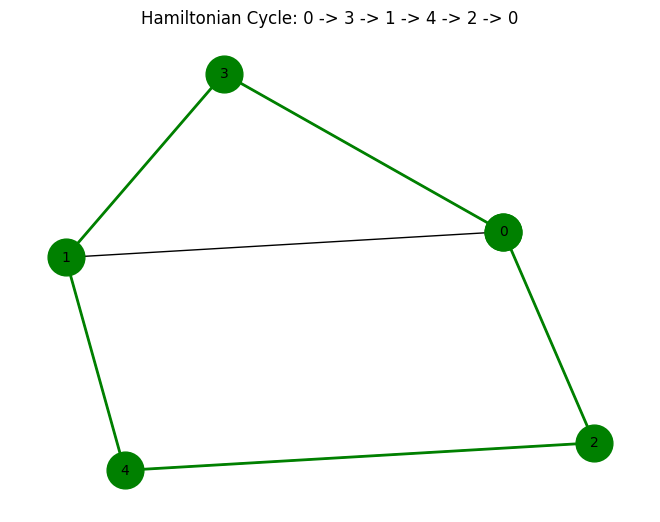

[1, 3, 0, 2, 4, 1]


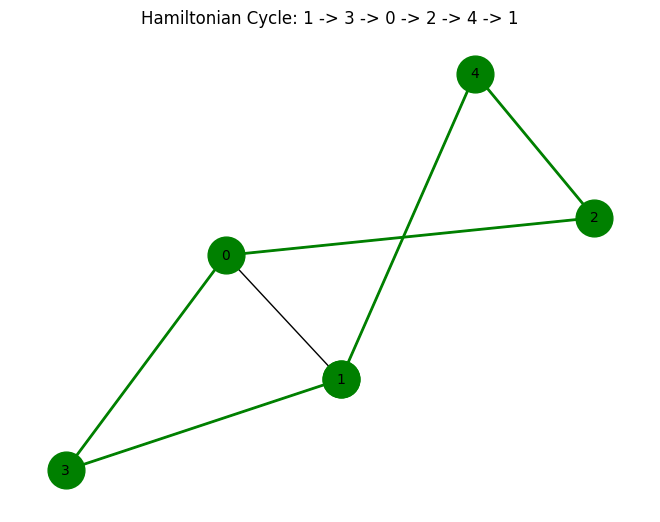

[1, 4, 2, 0, 3, 1]


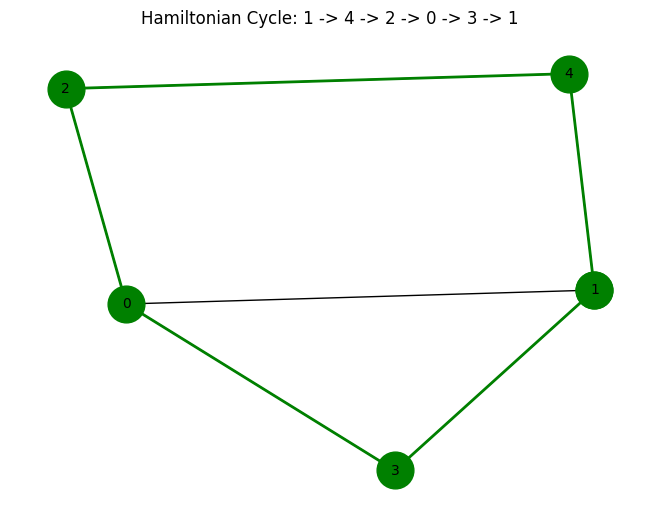

[2, 0, 3, 1, 4, 2]


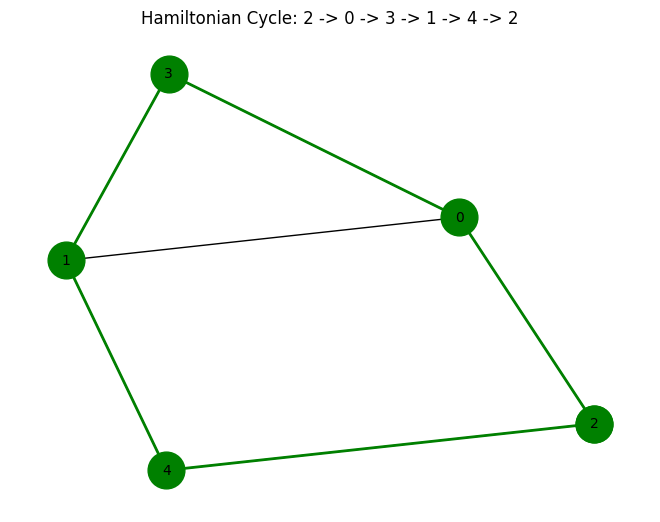

[2, 4, 1, 3, 0, 2]


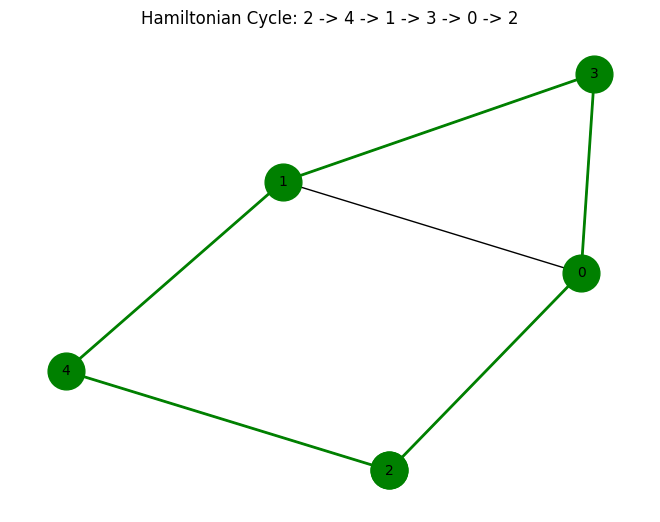

[3, 0, 2, 4, 1, 3]


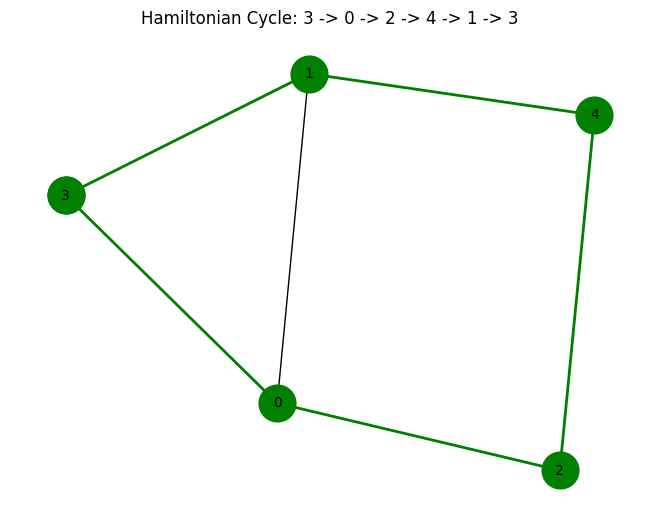

[3, 1, 4, 2, 0, 3]


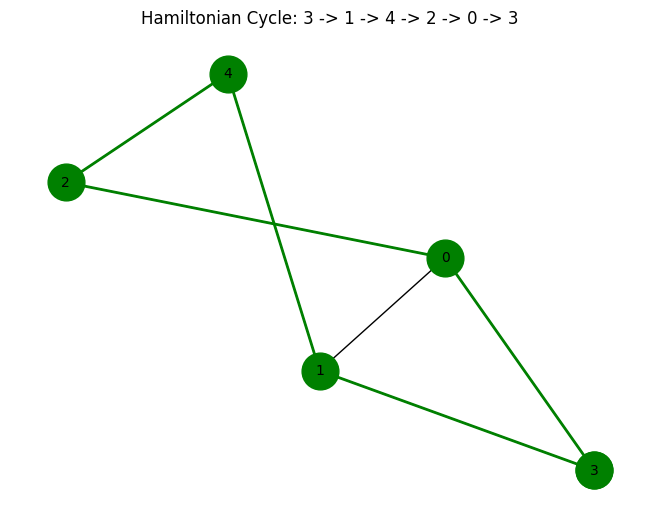

[4, 1, 3, 0, 2, 4]


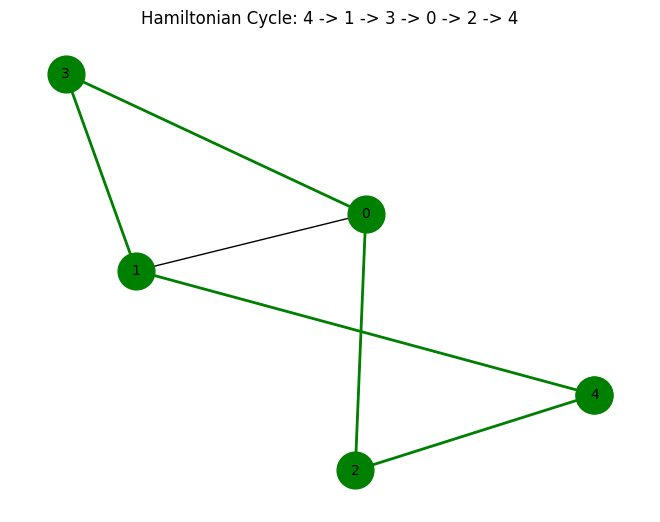

[4, 2, 0, 3, 1, 4]


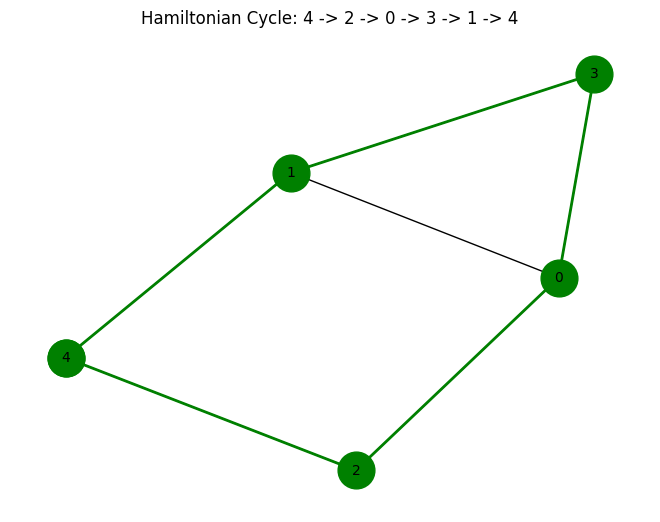

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def find_hamiltonian_cycles(graph):
    def dfs(current_node, start_node, visited, path, all_cycles):
        visited[current_node] = True
        path.append(current_node)
        
        # If the path includes all nodes and there's an edge back to the start node, we found a Hamiltonian cycle
        if len(path) == len(graph) and graph[current_node][start_node] == 1:
            path.append(start_node)
            all_cycles.append(path.copy())
            path.pop()  # remove the start node from the path to continue searching
        else:
            for i in range(len(graph)):
                if graph[current_node][i] == 1 and not visited[i]:
                    dfs(i, start_node, visited, path, all_cycles)
        
        path.pop()
        visited[current_node] = False

    all_cycles = []
    visited = [False] * len(graph)
    
    # Start DFS from each node to find all Hamiltonian cycles
    for start_node in range(len(graph)):
        dfs(start_node, start_node, visited, [], all_cycles)
    
    return all_cycles

def visualize_graph(graph):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(i, len(graph)):
            if graph[i][j] == 1:
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    
    # Show the default graph
    plt.title("Default Graph")
    plt.show()

def visualize_cycle(graph, cycle):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] == 1:
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    
    # Highlight the cycle found
    cycle_edges = [(cycle[i], cycle[i+1]) for i in range(len(cycle) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='g', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=cycle, node_color='g', node_size=700)
    
    # Show the plot with the cycle highlighted
    plt.title(f"Hamiltonian Cycle: {' -> '.join(map(str, cycle))}")
    plt.show()

if __name__ == "__main__":
    # Example graph represented as an adjacency matrix
    graph = [
        [0, 1, 1, 1, 0],
        [1, 0, 0, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0],
        [0, 1, 1, 0, 0],
    ]
    
    # Visualize the graph
    visualize_graph(graph)

    # Find and visualize all Hamiltonian cycles
    hamiltonian_cycles = find_hamiltonian_cycles(graph)
    
    if hamiltonian_cycles:
        print("There are "+str(len(hamiltonian_cycles))+" cycles")
        print(f"All Hamiltonian cycles:")
        for cycle in hamiltonian_cycles:
            print(cycle)
            visualize_cycle(graph, cycle)
    else:
        print("No Hamiltonian cycle found.")
